# Compute Drawdown

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")

/Users/arturopolancolozano/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


<Axes: >

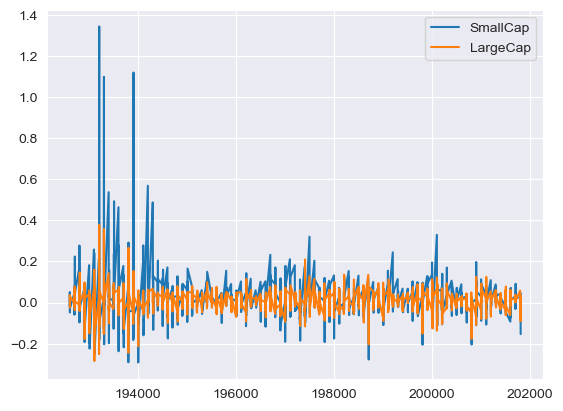

In [7]:
data = pd.read_csv(
    "../data/Portfolios_Formed_on_ME_monthly_EW.csv",
    header = 0, 
    index_col = 0, 
    parse_dates = True,
    na_values= -99.99
)

data = data[["Lo 10", "Hi 10"]]
data.columns = ["SmallCap", "LargeCap"]
data = data.div(100)
data.plot()

In [8]:
data.index = pd.to_datetime(data.index, format="%Y%m")
data.index = data.index.to_period("M")
data.index

PeriodIndex(['1926-07', '1926-08', '1926-09', '1926-10', '1926-11', '1926-12',
             '1927-01', '1927-02', '1927-03', '1927-04',
             ...
             '2018-03', '2018-04', '2018-05', '2018-06', '2018-07', '2018-08',
             '2018-09', '2018-10', '2018-11', '2018-12'],
            dtype='period[M]', length=1110)

<Axes: >

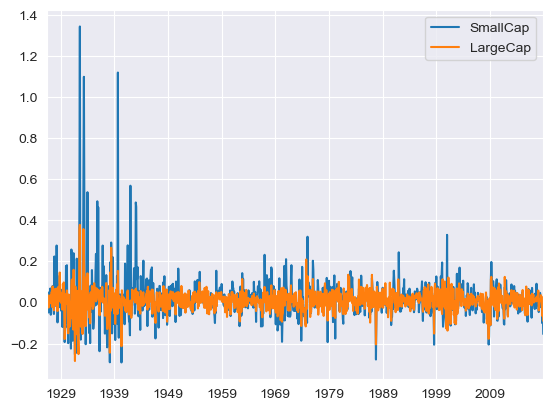

In [9]:
data.plot()

In [10]:
data.head()

,SmallCap,LargeCap
1926-07,-0.0145,0.0329
1926-08,0.0512,0.0370
1926-09,0.0093,0.0067
1926-10,-0.0484,-0.0243
1926-11,-0.0078,0.0270


# Compute Drawdowns
1. Compute wealth index
2. Compute previous peaks
3. Compute drawdown - Which is the wealth value as a percentage of the previous peak

In [11]:
wealth_index = 1_000
data.head()


,SmallCap,LargeCap
1926-07,-0.0145,0.0329
1926-08,0.0512,0.0370
1926-09,0.0093,0.0067
1926-10,-0.0484,-0.0243
1926-11,-0.0078,0.0270


<Axes: >

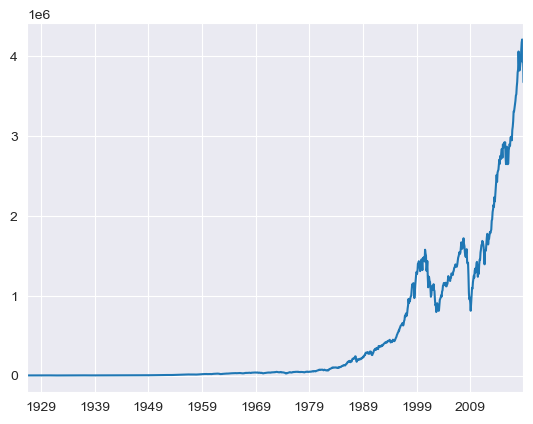

In [24]:
wealth_index = data.loc[:, "LargeCap"].add(1).cumprod().multiply(1_000)
wealth_index.plot()

<Axes: >

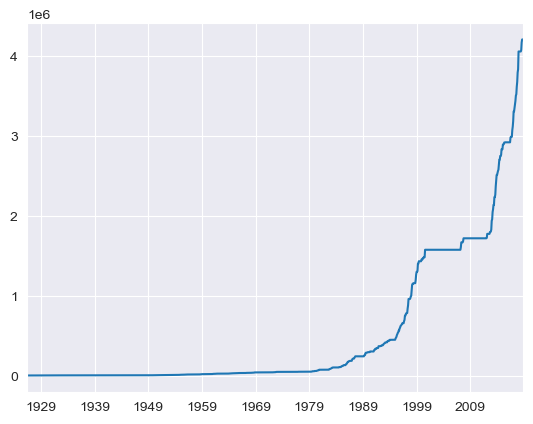

In [25]:
previous_peaks = wealth_index.cummax()
previous_peaks.plot()

<Axes: >

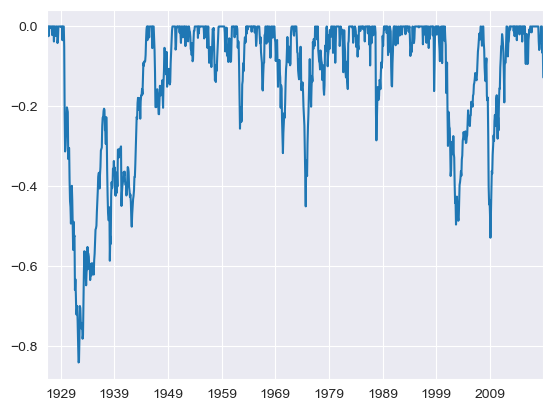

In [27]:
drawdown = wealth_index.subtract(previous_peaks).divide(previous_peaks)
drawdown.plot()

In [29]:
drawdown.head()

1926-07    0.0000
1926-08    0.0000
1926-09    0.0000
1926-10   -0.0243
1926-11    0.0000
Freq: M, Name: LargeCap, dtype: float64

In [28]:
drawdown.min()

-0.8400375277943123

In [32]:
drawdown.loc["1975":].min()

-0.5280945042309304

In [33]:
drawdown.loc["1975":].idxmin()

Period('2009-02', 'M')

In [35]:
drawdown.idxmin()

Period('1932-05', 'M')

In [38]:
def drawdown(input_series:pd.Series):
    """
    Takes a time series of returns and 
    computes and returns:
    - Wealth index
    - Previous peaks
    - Percent Drawdown
    """

    output_wealth_index  = input_series.add(1).cumprod().multiply(1_000)
    output_previous_peaks = output_wealth_index.cummax()
    output_drawdowns = output_wealth_index.subtract(
        output_previous_peaks).divide(
            output_previous_peaks
    )

    output_data = pd.DataFrame(
        {
            "wealth": output_wealth_index,
            "peaks": output_previous_peaks,
            "drawdown": output_drawdowns
        }
    )
    return output_data


drawdown(data["LargeCap"]).head()


,wealth,peaks,drawdown
1926-07,1032.900000,1032.900000,0.0000
1926-08,1071.117300,1071.117300,0.0000
1926-09,1078.293786,1078.293786,0.0000
1926-10,1052.091247,1078.293786,-0.0243
1926-11,1080.497711,1080.497711,0.0000


<Axes: >

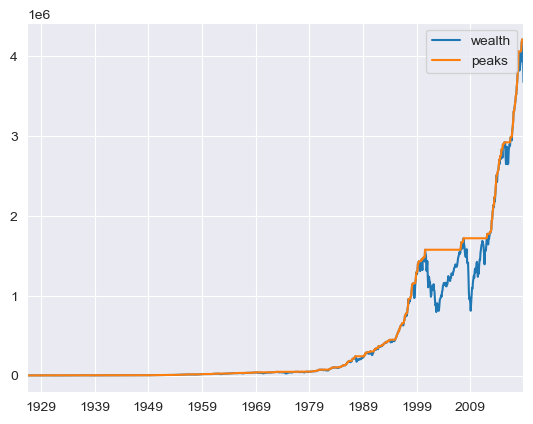

In [39]:

drawdown(data["LargeCap"])[["wealth", "peaks"]].plot()

<Axes: >

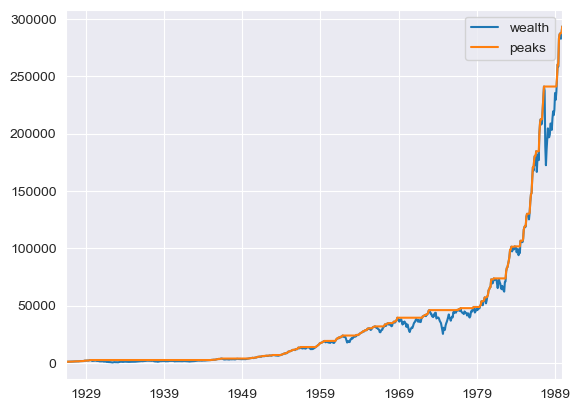

In [40]:
drawdown(data["LargeCap"])[["wealth", "peaks"]].loc[:"1989"].plot()